# Regresión lineal univariable: Ejercicios
## Ejercicio 1: ¿Cómo evaluar modelos de machine learning?
**Evaluar** el modelo de regresión lineal obtenido en la EPD 2 para predecir los beneficios de un restaurante según la población de la ciudad. Use diferentes métodos de evaluación y compare los resultados.

1) Cargar los datos de entrada almacenados en el fichero ex1data1.txt y visualizar las dimensiones de la matriz de atributos, del vector clase y las primeras 5 filas de los aributos junto a su clase

In [48]:
data = load('ex1data2.txt');
[m n]=size(X);
fprintf("El tamaño de X es: %dx%d\n", m,n);
fprintf("La longitud del vector y es: %d\n", length(y));
fprintf("Las 5 primeras filas de la matriz de datos [atributos|clase] es: \n");
for i=1:5
    fprintf("%d %d | %d €\n",X(i,:),y(i,:));
end

El tamaño de X es: 47x2
La longitud del vector y es: 47
Las 5 primeras filas de la matriz de datos [atributos|clase] es: 
2104 3 | 399900 €
1600 3 | 329900 €
2400 3 | 369000 €
1416 2 | 232000 €
3000 4 | 539900 €


In [54]:
X = data(:, 1:2); y = data(:, 3);
media = mean(X)
desviacion = std(X)
X= (X - media)./desviacion;
fprintf("Tamaño x = %d %d",size(X));

media =

   2000.6809      3.1702

desviacion =

   794.70235     0.76098

Tamaño x = 47 2

2) Visualizar en una gráfica los datos

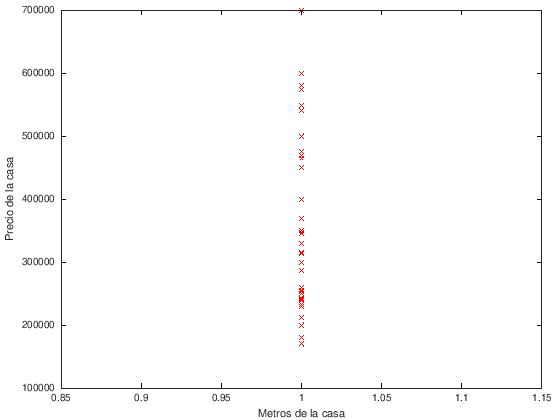

In [17]:
figure(); % open a new figure window
plot(X(:,1), y, 'rx', 'MarkerSize', 4);
ylabel('Precio de la casa');
xlabel('Metros de la casa');

2) El objetivo de la regresión lineal es minimizar el coste de la función:
\begin{equation}
J(\theta_0,\theta_1)=\frac{1}{2 \cdot m}\sum_{i=1}^{m} (h_{\theta}(x^i)-y^i)^2
\end{equation}

Implementar la función computeCost(X,y,theta) de manera que devuelva el valor del coste. La matriz X es la matriz formada por la población de cada ciudad e y es el vector formado por los beneficios del establecimiento de cada ciudad. Para facilitar las operaciones vectorizadas, añada una columna con todos sus elementos a 1 a la matriz X como primera columna, de esta manera se podrá calcular la hipótesis h que viene dada por el modelo lineal:

\begin{equation}
h_{\theta}(x)=\theta_0 + \theta_1 \cdot x \quad \mbox{ ó  } \quad h_{\theta}(x)=\theta^T \cdot x
\end{equation}

In [11]:
# FUNCTION: computeCost
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression
%J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%parameter for linear regression to fit the data points in X and y

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta 
%                    You should set J to the cost.

J = (1/(2*m)) * sum((X * theta - y).^2);

% =========================================================================

end

Una vez completado el código de la función computeCost, ejecutar la función usando un vector de theta inicializados a cero y comprobar que sale la salida esperada por pantalla. Recordar que hay que añadir una columna de 1's a la matriz de atributos.

In [21]:
X = [ones(m, 1), data(:,1:2)]; % Add a column of ones to x
theta = zeros(3,1); % initialize fitting parameters

% compute and display initial cost
J=computeCost(X, y, theta)

J =  65591548106.45744


## Expected Output: 
### <center> J=32.07 </center>


3) Implementar el método de descenso del gradiente. La función recibirá como parámetro, además de los datos X e y, los parámetros theta, alpha y el número de iteraciones. Estos dos últimos se pueden inicializar a 0,01 y 1500 respectivamente. La función deberá devolver los parámetros theta finales y un histórico con el coste en cada iteración. Mostrar por pantalla los valores de theta.

In [16]:
# FUNCTION: gradientDescent
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha

% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    % ====================== YOUR CODE HERE ======================
    % Instructions: Perform a single gradient step on the parameter vector
    %               theta. 
    %
    % Hint: While debugging, it can be useful to print out the values
    %       of the cost function (computeCost) and gradient here.
    %

    theta = theta - alpha* (1/m) * (X' * (X * theta - y));
   
    % ============================================================

    % Save the cost J in every iteration    
    J_history(iter) = computeCost(X, y, theta);

end

end

## Evaluación usando Holdout: Programa principal

Una vez tenemos todas las funciones necesarias, vamos a implementar la función principal en la que se llamarán a las diferentes funciones. El programa principal consta de las siguientes partes:

        1) Dividir el dataset en 70% para entrenamiento y 30% para test usando la función holdout suministrada en el material
        2) Inicializar alfa a 0,01 y el número de iteraciones a 1500
        3) Obtener el modelo. Para ello, ejecutar el descenso del gradiente llamando a la función correspondiente con el conjunto de entrenamiento
        4) Una vez obtenido el modelo, visualizar la fución de coste J a través de las iteraciones
        5) Visualizar el óptimo encontrado por el método de descenso del gradiente
        6) Visualizar el modelo obtenido
        7) Predecir el conjunto de test y calcular el error



In [8]:
m

m =  97


error: gradientDescent: operator *: nonconformant arguments (op1 is 32x2, op2 is 3x1)
error: called from
    gradientDescent at line 20 column 11
error: 'J_history' undefined near line 2 column 15


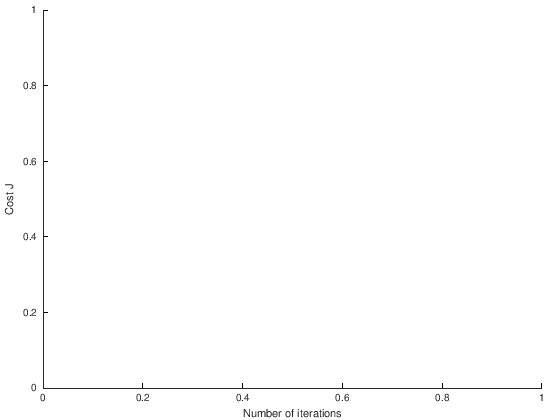

In [55]:
% Indicar el porcentaje de división en la variable percent, el valor 0,7 indica 70% para entrenameinto y el resto para test
percent=0.7;
%m es la longitud del vector y
m= length(y);
%Usar función holdout para obtener el conjunto de entrenamiento y el conjunto de test
[X_train,y_train, X_test, y_test] = holdout(X,y,m,percent);

%Inicializar alfa y el número de iteraciones
iterations = 1500;
alpha = 0.01;

%Obtener el modelo para el conjunto de entrenamiento X_train, y_train

%theta = zeros(2,1); % initialize fitting parameters

[theta, J_history] = gradientDescent(X_train, y_train, theta, alpha, iterations);

%Dibujar la función de coste
figure();%Crear figura

%Dibujo la función de coste correspondiente a J_history
plot(1:length(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');%Título del eje X
ylabel('Cost J');%Título del eje Y

## Responder las siguientes cuestiones: 
** ¿Ha encontrado el óptimo el descenso del gradiente? ¿Por qué? **

5) Visualizar el óptimo encontrado usando la función Visualization.m suministrada en el material.

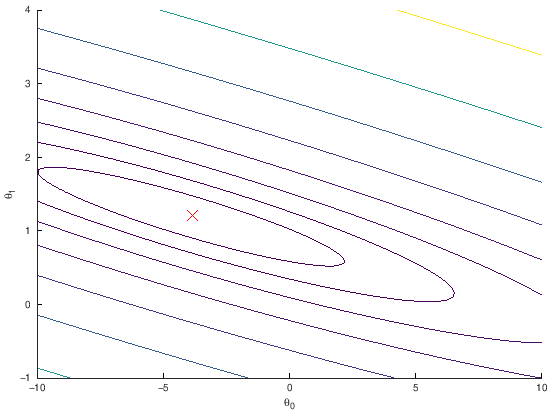

In [25]:
%Dibujar curvas de nivel y el óptimo encontrado para el modelo theta
Visualization(X,y,theta);

6) Visualizar gráficamente el modelo obtenido.

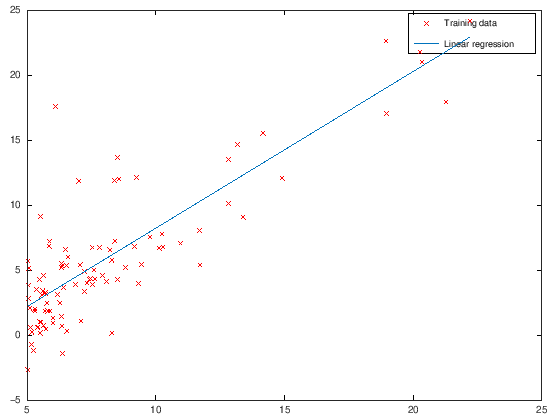

In [26]:
plot(X(:,2), y, 'rx', 'MarkerSize', 4);%Dibujar matriz X
hold on; % % Mantiene la figura anterior para dibujar encima
plot(X(:,2), X*theta, '-')%Dibuja modelo h=X * theta
legend('Training data', 'Linear regression')%Inserta leyenda en la gráfica

7) Predecir el conjunto de test usando el modelo aprendido con el conjunto de training y mostrar el error

In [47]:
% Predecir el conjunto de test X_test usando el modelo obtenido theta
pre = X_test * theta;
%m es el número de elementos del vector y_test
m = length(y_test);
%Calcular el error cabsoluto medio cometido en la predicción comparando con los valores reales y_test
error = (1/m) * sum(abs(pre-y_test));
%Imprimir error por pantalla
fprintf("El error absoluto medio de mi predicción es: %0.5f \n",error);

El error absoluto medio de mi predicción es: 2.48610 


In [45]:
pre = [1, 35000];
    fprintf("La prediccion de 35000 habitantes es: %.02f\n",pre * theta);

La prediccion de 35000 habitantes es: 42209.54


## Evaluación usando Cross-validation: Programa principal

La evaluación mediante validación cruzada consiste en la división del conjunto de datos en K bolsas, haciendo que cada una de estas bolsas sea el conjunto de test mientras que las K-1 restantes sean el conjunto de entrenamiento. De esta forma, se calculan K modelos y el error que cada uno de ellos comete al predecir el conjunto de test correspondiente. La media de los K errores es el error que determina si la regresión lineal es un buen método de aprendizaje y la predicción de una instancia desconocida se estimaría con la media de la predicción obtenida por cada modelo. 

Ahora vamos a implementar la función principal en la que se llamarán a las diferentes funciones. El programa principal consta de las siguientes partes:

1) **Inicialización**:  Hay que inicializar el número de bolsas a usar (parámetro K). En este caso, inicializar al valor 5. Inicializar alfa a 0,01 y el   número de iteraciones a 1500. Inicializar el error a un vector de ceros. Este vector error almacenará cada uno de los errores obtenido por cada           modelo.

2) **Construcción de conjuntos entrenamiento y test**. Para ello, debe seguir los siguientes pasos:       
        
        2.1) Usar la función cv.m suministrada en el material para construir los índices que nos ayudarán a crear las diferentes bolsas en las que se                          dividirá el conjunto de datos. Esta función recibe el número de filas que tiene la matriz de datos y el número de bolsas en el que queremos                    dividir la matriz y devuelve un vector de m elementos cuyos valores están en el conjunto {1,2,3,...,K}. Por ejemplo: Si la matriz tiene 10 filas                  y queremos dividir en 3 bolsas una posible salida de la función cv(10,3) sería: 2 3 1 1 3 3 2 3 1 2. La interpretación de ese vector es: Las                      instancias 3, 4 y 9 forman la bolsa 1, las instancias 1,7 y 10 forman la bolsa 2, y las instancias 2, 5, 6 y 8 formarán la bolsa 3. 
        
        2.2) Crear los diferentes conjuntos de tests y conjuntos de training. Para crear los diferentes conjuntos de test y training use el operador lógico                    ==. 
        
              Ejemplo: Si tenemos el vector de índices que devuelve la función cv, y ejecutas en Octave la sentencia: 
                        test = (indices == 2);
                        
              La variable test será un vector de 0´s y 1´s, donde si en la posición 3 aparece un 1 significa que la instancia 3 forma parte del conjunto 
              de test que corresponde a la bolsa 2. Por tanto, si hacemos: 
                         
                         X_test = X(test,:);
            
             La variable X_test será una matriz formada por las filas de la matriz X correspondientes a las posiciones donde hay valores 1's 
             en el vector test. 
            
3) **Modelo**: Una vez creado los conjuntos, obtener el modelo y el error para cada uno de ellos. Para obtener el modelo, ejecutar el descenso del gradiente llamando a la función correspondiente con el conjunto de entrenamiento correspondiente.

4) **Visualización**:
        
        4.1) Visualizar la fución de coste J a través de las iteraciones para cada modelo
        
        4.2) Visualizar el óptimo encontrado por el método de descenso del gradiente para cada modelo
        
        4.3) Visualizar cada modelo obtenido       



In [52]:
%Elegimos el número de particiones para cross-validation 
K = 5;
% Inicializamos vector de errores a 0
error = zeros(K)
%Inicializamos alfa y el número de iteraciones
iterations = 15000;
alpha = 0.01;

%Hago partición para crossvalidation
indices = cv(X,K);
%Para cada bolsa desde 1 hasta K
for i=1:K
    % =================== Creación de conjunto de entrenamiento===================
    %Conjunto de índices que indican las filas de la matriz X que formarán parte del conjunto de test y del conjunto de training 
      test = 
      train = ~test;
    
    %Conjunto de entrenamiento para cada partición. La variable X_train es la matriz de atributos correspondiente al entrenamiento, y la 
    %variable y_train es el vector de la clase correspondiente al conjunto X_train 
      X_train = 
      y_train = 
     
    % =================== Obtención del modelo===================
    %Obtener el modelo para el conjuto de entrenamiento X_train, y_train creado anteriormente
    
    
    %Almcenamos el vector theta y el vector J_history para la iteración i
     theta_fold(:,i) = 
     J_history_fold(:,i) = 
       

    % Print theta_fold en pantalla
    fprintf('Theta encontrado por el descenso del gradiente en la iteración i: ');
    fprintf('%f %f \n', theta_fold(:,i));
   
    % =================== Prediccion del conjunto de test ===================
    %Conjunto de test para cada partición. La variable X_test es la matriz de atributos correspondiente al conjunto de test, y la 
    %variable y_test es el vector de la clase correspondiente al conjunto X_test 
    X_test = 
    y_test = 
        
    % Predecir el conjunto de test X_test usando el modelo theta_fold(:,i)
    pre = 
    
    %Calcular el error absoluto medio cometido en la predicción comparando con los valores reales y_test
    m = length(y_test);
    error(i) = 
    
end
%Print el error medio de los K modelos en pantalla
fprintf(['Error (usando descenso del gradiente):\n $%.2f\n'],         );

error =

   0   0   0   0   0
   0   0   0   0   0
   0   0   0   0   0
   0   0   0   0   0
   0   0   0   0   0

parse error:

  syntax error

>>>       test = 
                ^

"perl" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
    print_usage at line 74 column 5
    test at line 134 column 5
error: Invalid call to test.  Correct usage is:



Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at https://www.octave.org and via the help@octave.org
mailing list.
parse error:

  syntax error

>>>       X_train = 
                   ^

parse error:

  syntax error

>>>       y_train = 
                   ^

parse error:

  syntax error

>>>      theta_fold(:,i) = 
                          ^

parse error:

  syntax error

>>>      J_history_fold(:,i) = 
              

4.1) Visualizar la fución de coste J a través de las iteraciones para cada modelo

In [ ]:
%Para cada modelo desde 1 hasta K
for i=
    figure();%Crear una figura
    %Dibujar la función de coste correspondiente a J_history_fold(:,i)
    
    xlabel('Number of iterations');%Título del eje X
    ylabel('Cost J');%Título del eje Y
end

4.2) Visualizar el óptimo encontrado usando la función Visualization.m suministrada en el material.

In [ ]:
% Para cada modelo desde 1 hasta K 
for i=
    figure(1); %Crear una figura fija
    %Dibujar curvas de nivel y el óptimo encontrado para el modelo theta_fold(:,i)
    
end

4.3) Visualizar cada modelo obtenido

In [ ]:
% Para cada modelo desde 1 hasta K 
for i=
    figure(2);%Crea una figura fija
    %Dibuja matriz X
    
    hold on; % Mantiene la figura anterior para dibujar encima
    %Dibuja modelo h=X * theta_fold(:,i)
    
    legend('Training data', 'Linear regression');%Inserta leyenda en la gráfica
end